<a href="https://colab.research.google.com/github/NEEEEEEEEEEEL/Debnil/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
##load cifar10 datasets and store them in x_train,x_test,y_train and y_test

In [6]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
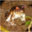

In [7]:
x_train[0]

##now to see the images

<Figure size 1500x200 with 0 Axes>

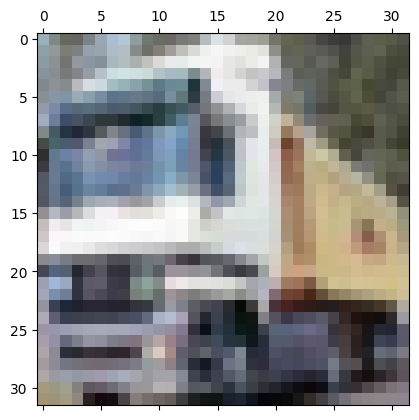

In [10]:
plt.figure(figsize=(15,2))
plt.matshow(x_train[1])

##now y_train looks like this


In [11]:
y_train[:5]  ##its a 2d array,so we need to reshape it

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train=y_train.reshape(-1,)    ##when you dont want to change the fisrt dim keep it -1 and to flatten the value just keep it blank
y_train[:5]     ##now its a 1d array

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
classes=["aeroplane","autmobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

##we can create a function to show the image

In [27]:
def plot_sample(x,y,index):
  plt.figure(figsize=(9,2))
  plt.matshow(x[index])
  plt.xlabel(classes[y[index]])

<Figure size 900x200 with 0 Axes>

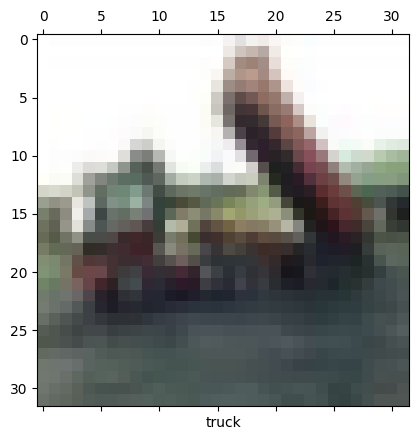

In [28]:
plot_sample(x_train,y_train,2)

##whenever you have an image you have a range from 0-255
##but we need to scale it down to 0-1 range
##by dividing the training dataset by 255
##and by doing so the values are normalized

In [30]:
x_train/255
x_test/255

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

##model building and training

In [43]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",    ##use sparse when y=value and normal categorical when y= vector
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=1)

 603/1563 [==========>...................] - ETA: 1:54 - loss: nan - accuracy: 0.0973

KeyboardInterrupt: 

##classification report code format

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_pred,y_pred_classes))

##but ANN wont give good precision,so we use CNN

In [55]:
cnn=models.Sequential([
    #you will have some cnn layers here
    layers.Conv2D(filters=32,activation="relu",kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense layers
    layers.Flatten(),#network will figure the shape automatically
    layers.Dense(64,activation="relu"),  #using only one dense layer
    layers.Dense(10,activation="softmax")
])

In [57]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

In [59]:
cnn.fit(x_train,y_train,epochs=1)  #epochs should be higher,you need higher gpu or ram or whatever

1563/1563 [==============================] - 69s 44ms/step - loss: 1.8563 - accuracy: 0.3476


In [60]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.7015 - accuracy: 0.4065


[1.701476812362671, 0.4065000116825104]

In [63]:
y_predicted=cnn.predict(x_test)
y_predicted

313/313 [==============================] - 5s 17ms/step


array([[8.85177180e-02, 8.34772289e-02, 1.10596113e-01, ...,
        8.61142725e-02, 8.91372263e-02, 1.00334123e-01],
       [2.85559446e-02, 6.93296969e-01, 7.00467863e-05, ...,
        3.18263726e-09, 1.70073107e-01, 1.08001225e-01],
       [1.25944568e-02, 6.70816796e-03, 2.28352472e-03, ...,
        1.00457646e-06, 9.45199370e-01, 3.25113535e-02],
       ...,
       [2.01958641e-02, 2.94089201e-03, 2.34572053e-01, ...,
        9.90187526e-02, 3.52972653e-03, 2.36787591e-02],
       [9.64722261e-02, 2.39867419e-01, 7.27147087e-02, ...,
        6.55405596e-02, 8.09304044e-02, 1.92284107e-01],
       [9.26486042e-04, 1.03571838e-05, 7.42739365e-02, ...,
        8.04954290e-01, 1.19509150e-05, 1.13996402e-05]], dtype=float32)

now we have to take the max among each array

In [65]:
np.argmax(y_predicted[0])

3

In [66]:
#turn this into a loop
y_classes=[np.argmax(element) for element in y_predicted]
y_classes[:5 ]

[3, 1, 8, 8, 3]

In [68]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 900x200 with 0 Axes>

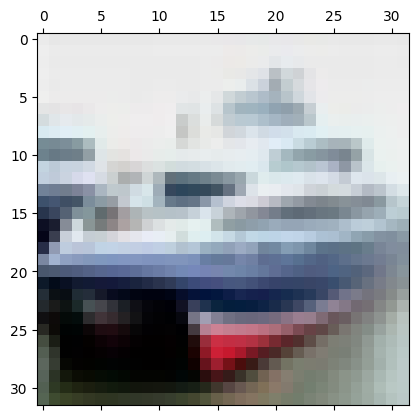

In [69]:
plot_sample(x_test,y_test,1)
c

In [70]:
classes[y_classes[1]]

'autmobile'